<a href="https://colab.research.google.com/github/LifeLeveller/Exploratory-Data-Analysis/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Used a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, focus is on the measurements of petal length.

#Plotting a histogram of iris data
Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. 

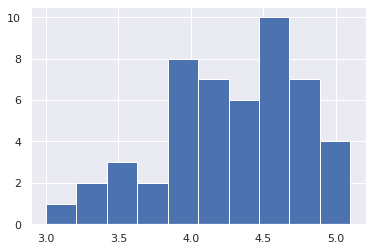

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

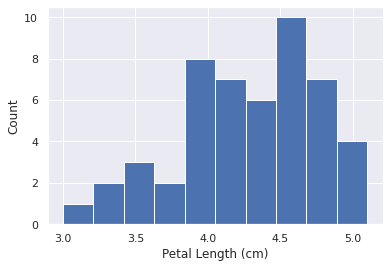

In [2]:
#Adding Axis labels

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)
 
# Label axes
plt.xlabel('Petal Length (cm)')
plt.ylabel('Count')
 
# Show histogram
plt.show()

##Adjusting the number of bins in a histogram
The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist().



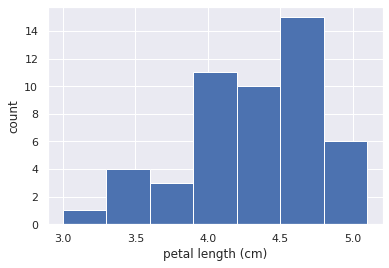

In [3]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)
 
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)
 
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
 
# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)
 
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
 
# Show histogram
plt.show()

##Bee swarm plot
Bee swarm plot of the iris petal lengths. x-axis contains each of the three species, and the y-axis the petal lengths

In [ ]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y = 'petal length (cm)', data=df)
 
# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')
 
# Show the plot
plt.show()

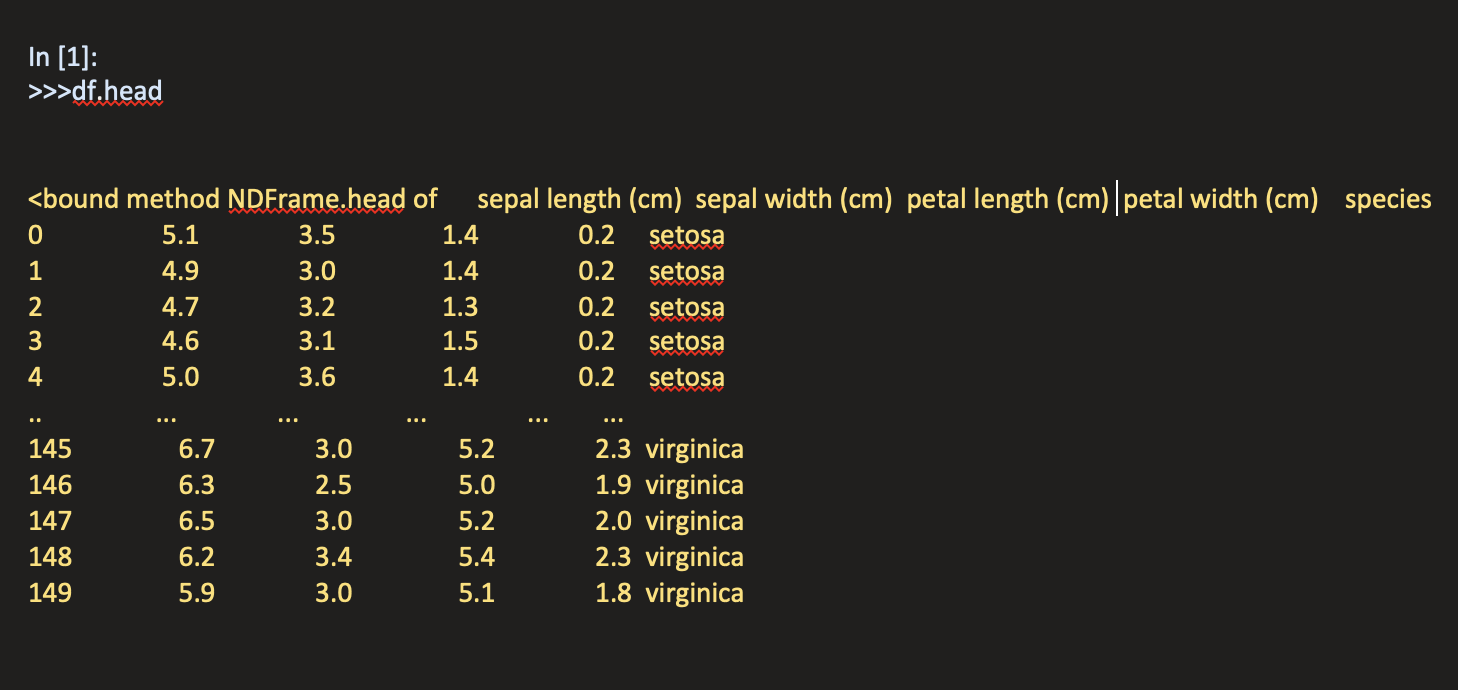

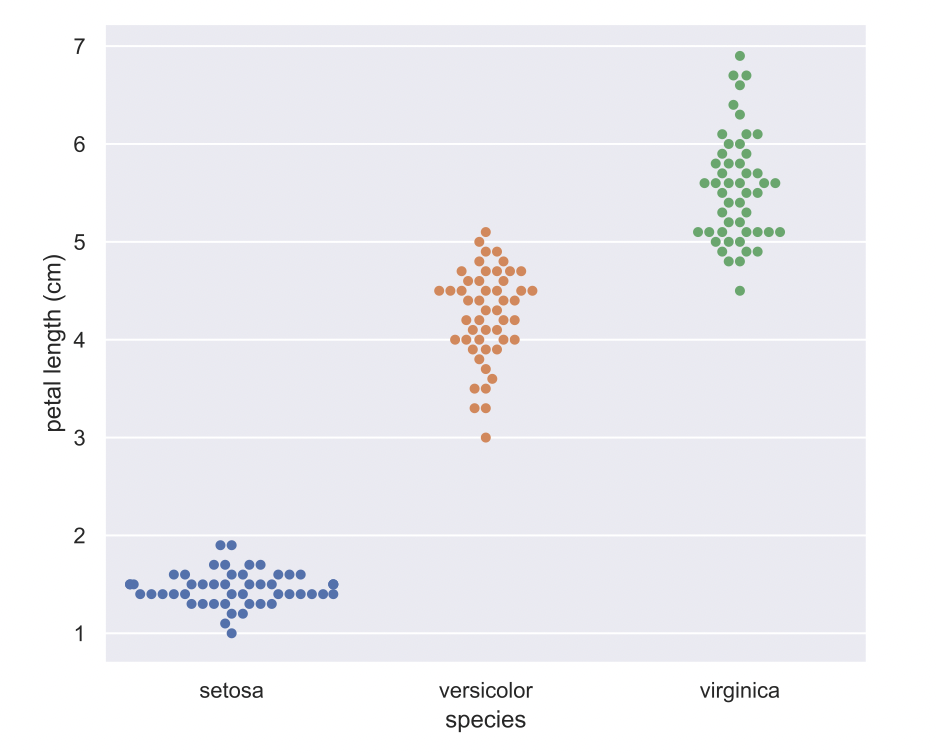

Interpreting a bee swarm plot

I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

##Empirical Cumulative Distribution Function (ECDF) calculation

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arrange(1, n+1) / n

    return x, y


In [ ]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers,y_vers,marker = '.',linestyle = 'none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


# Display the plot

plt.show()

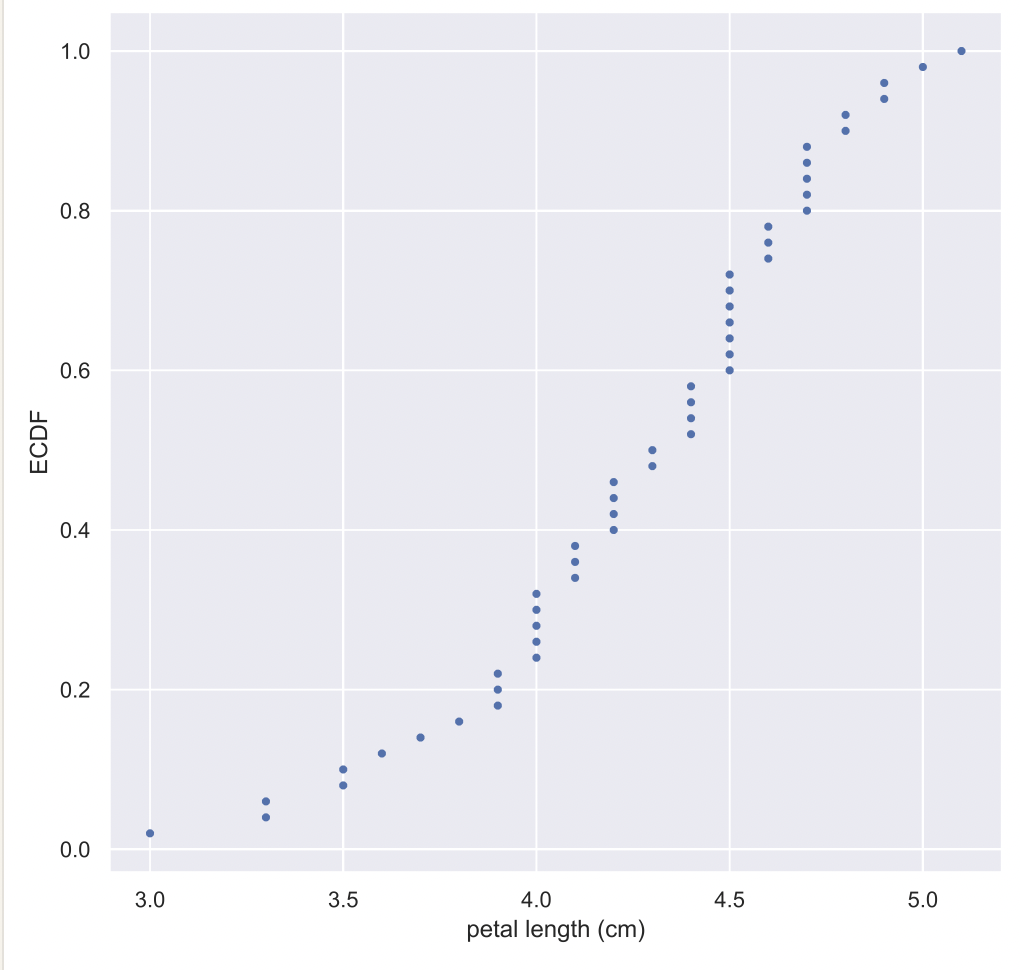

In [ ]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg,y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = '.', linestyle = 'none')
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.plot(x_virg, y_virg, marker = '.', linestyle = 'none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.
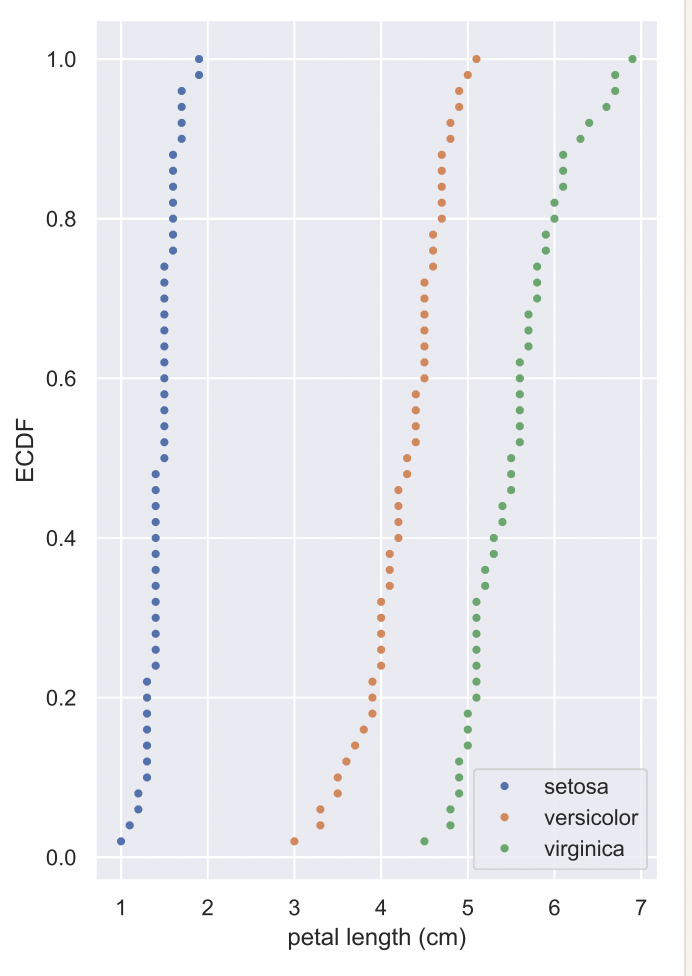

#Quantitative exploratory data analysis

In [ ]:
# Compute the mean: mean_length_vers

mean_length_vers = np.mean(versicolor_petal_length)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

#I. versicolor: 4.26 cm

##compute the percentiles of petal length of Iris versicolor.

In [ ]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

#[3.3    4.     4.35   4.6    4.9775]

In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker ='D', color ='red',
         linestyle ='none')

# Show the plot

plt.show()

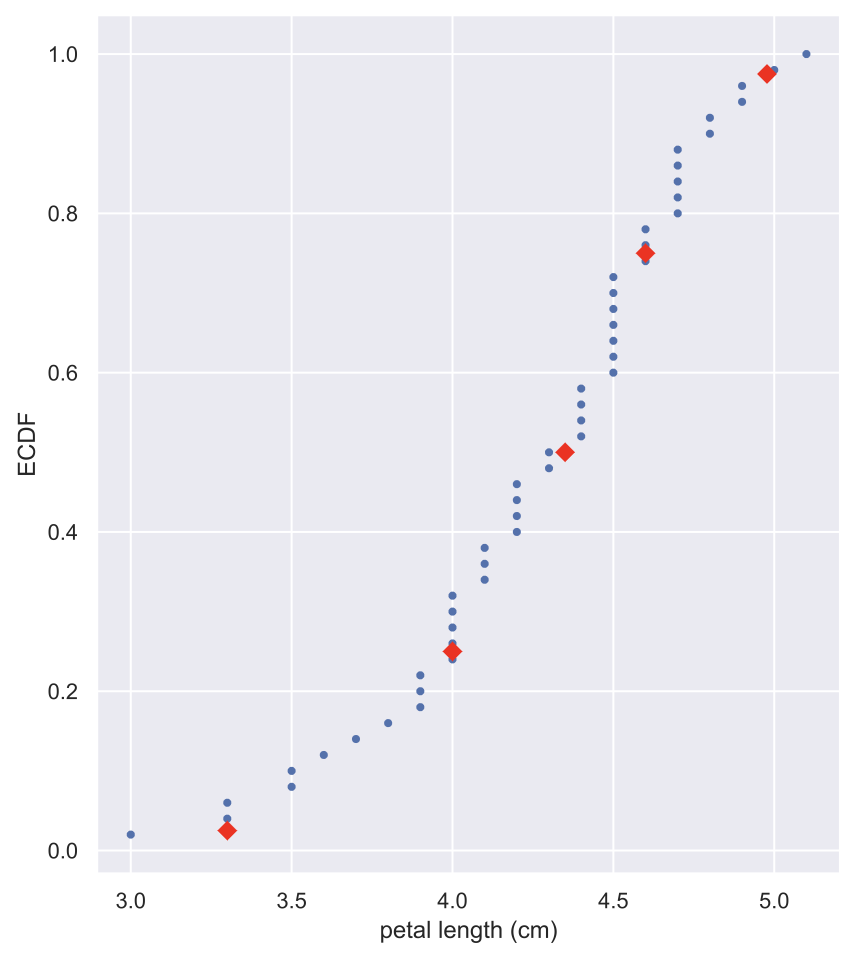

##Box-and-whisker plot

In [ ]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y = 'petal length (cm)', data = df)

# Label the axes

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


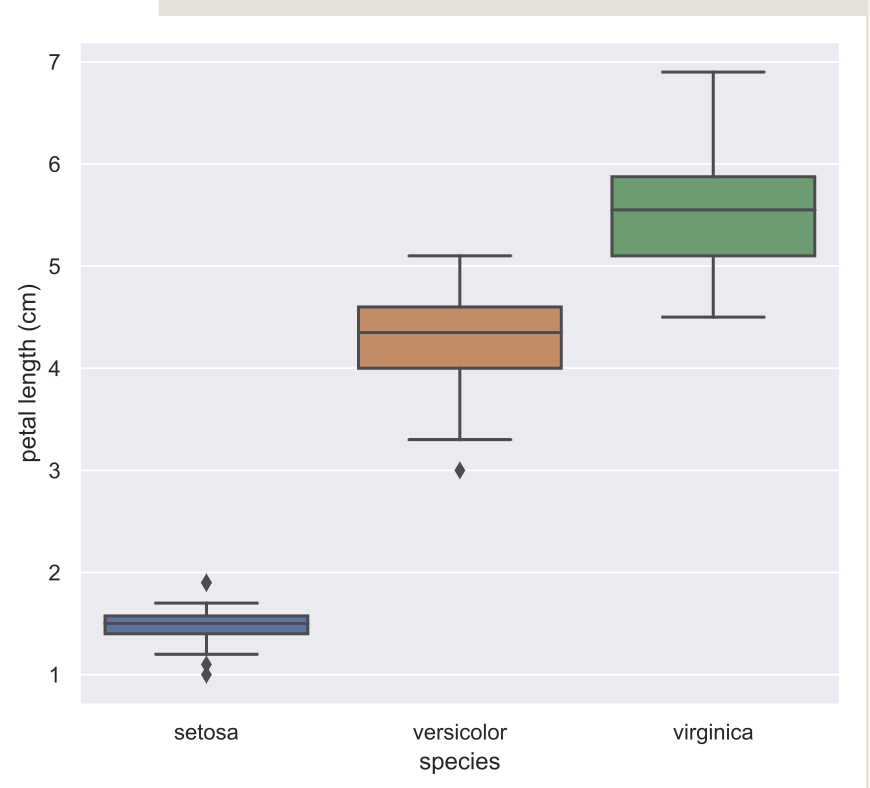

##Variance

In [ ]:
#Computing variance
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit,variance_np)

#Output:0.21640000000000004 0.21640000000000004

# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

# 0.4651881339845203
# 0.4651881339845203

##Scatter Plot

In [ ]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
 
 
# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
 
 
# Show the result
plt.show()

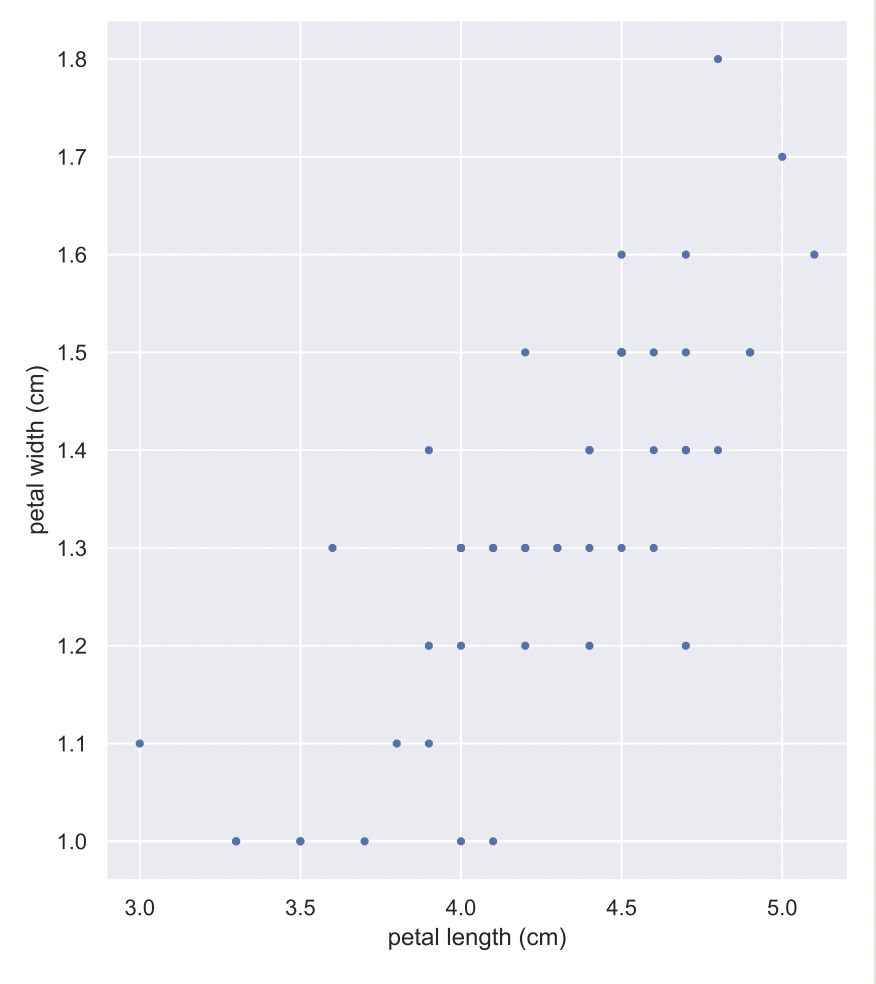

##Computing the covariance matrix

In [ ]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

'''Output: [[0.22081633 0.07310204]
 [0.07310204 0.03910612]] '''

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance

print(petal_cov)

#Output: 0.07310204081632653

##Pearson correlation coefficient, 

also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

#Output:0.7866680885228169